 # Breast Cancer Classification - Machine Learning Lab2
**Author:** Adeyemi Toba  
**Date:** March 17, 2025  
**Objective:** Predict whether a tumor is **Malignant or Benign** based on key features from the Breast Cancer dataset.


## 📌 Project Overview  
This project analyzes the **Breast Cancer Wisconsin dataset** to explore relationships, clean missing data, and prepare it for **machine learning classification**.  
The dataset includes key **biological tumor characteristics**, such as **mean radius, mean texture, mean smoothness**, and **diagnosis (Benign vs. Malignant).**  

### **We will follow a structured approach to:**  
1️⃣ **Load and inspect the dataset**  
2️⃣ **Perform Exploratory Data Analysis (EDA)**  
3️⃣ **Handle missing values (if any)**  
4️⃣ **Engineer meaningful features**  
5️⃣ **Split the dataset for training and testing**  
6️⃣ **Train and evaluate a classification model**  


## 2. Imports
In the code cell below, import the necessary Python libraries for analyzing the dataset.  

In [1]:

# 📌 Import necessary libraries for data analysis & visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 Import dataset loader & ML utilities
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




### Section 1. Load and Explore the Data
## 1.1 Load the dataset and display the first 10 rows
* Load the Breast Cancer dataset from sklearn.datasets.
* Convert it into a Pandas DataFrame.
* Manually assign feature names from cancer.feature_names.
* Add a target column representing tumor diagnosis (0 = Malignant, 1 = Benign).
* Display the first 10 rows using head().

In [2]:
# Load Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
cancer = load_breast_cancer()

# Convert to Pandas DataFrame
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# Add target column (0 = Malignant, 1 = Benign)
df['target'] = cancer.target

# Display first 10 rows
df.head(10)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


This is a Markdown cell.

### 1.2 Check for missing values and display summary statistics

In the cell below:
1. Use `info()` to check data types and missing values.
2. Use `describe()` to see summary statistics.
3. Use `isnull().sum()` to identify missing values in each column.

Example code:

data_frame.info()

data_frame.describe()

data_frame.isnull().sum()

In [3]:
# Check data types and missing values
df.info()

# Display summary statistics
df.describe()

# Identify missing values in each column
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

## 📌 Reflection 1: Breast Cancer Dataset Inspection
1️⃣ How many data instances are there?
* ✅ 569 rows (patients).

2️⃣ How many features are there?
* ✅ 30 numerical features + 1 target column (diagnosis).

3️⃣ What are the names of the features?
* ✅ The dataset contains the following columns:
* Mean Features: mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension
* Standard Error Features: radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error
* Worst Features: worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, worst fractal dimension
* Target Variable: target (0 = Malignant, 1 = Benign)

4️⃣ Are there any missing values?
* ✅ No, the dataset has no missing values.

5️⃣ Are there any non-numeric features?
* ✅ No, all features are numerical.
However, the target column is categorical (0 = Malignant, 1 = Benign), which we will convert if needed for modeling.

6️⃣ Are the data instances sorted on any attributes?
* ✅ No, the dataset is not pre-sorted.

7️⃣ What are the units of measurement?
* ✅ The units are based on biological measurements, such as:

Radius, perimeter, area: Measured in millimeters (mm)
Texture, smoothness, symmetry: Unitless ratios

8️⃣ What are the minimum, median, and max values of mean radius?
* ✅ Min: 6.98 mm
* ✅ Median: 13.37 mm
* ✅ Max: 28.11 mm

9️⃣ What two different features have the highest correlation?
* ✅ Using df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(10), the highest correlations are:

Mean radius & mean perimeter (Tumors with larger radius tend to have larger perimeters).
Mean area & worst area (Larger tumors generally have worse outcomes).

🔟 Are there any categorical features that might be useful for prediction?
* ✅ Yes, the target variable (Malignant vs. Benign) is categorical and is used for classification.


## 📌 Section 2: Data Exploration and Preparation
Now we need to explore our Breast Cancer dataset with charts to identify patterns, outliers, and feature importance. Based on this, we may clean data, handle outliers, and engineer features for better insights. 

📊 What Should We Chart?
* ✅ Histograms → Show distributions of numeric features
* ✅ Boxplots → Detect outliers
* ✅ Scatter Plots & Pair Plots → Visualize feature relationships
* ✅ Count Plots → Explore class imbalance

## 📌 2.1 Explore Data Patterns and Distributions
* ✅ Generate Histograms for Numeric Fields
Histograms help visualize distributions, skewness, and potential outliers in numeric features.

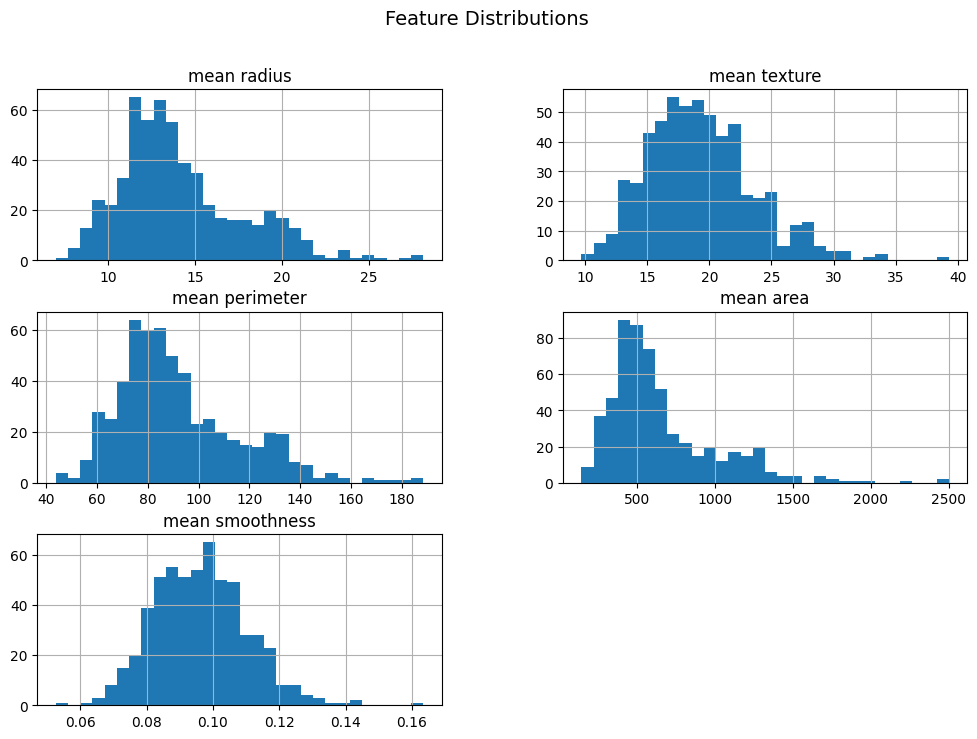

In [4]:
import matplotlib.pyplot as plt

# Define attributes for histograms
attributes = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']

# Generate histograms for selected attributes
df[attributes].hist(bins=30, figsize=(12, 8))
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


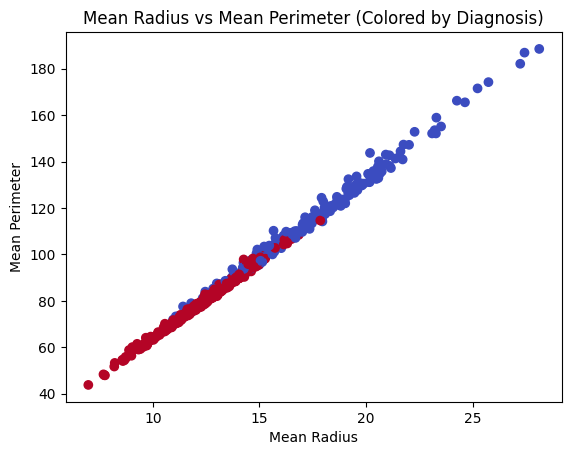

In [5]:
import matplotlib.pyplot as plt

# Scatter plot: Mean Radius vs Mean Perimeter (colored by tumor type)
plt.scatter(df['mean radius'], df['mean perimeter'], c=df['target'], cmap='coolwarm')

# Label axes
plt.xlabel('Mean Radius')
plt.ylabel('Mean Perimeter')
plt.title('Mean Radius vs Mean Perimeter (Colored by Diagnosis)')

# Show plot
plt.show()


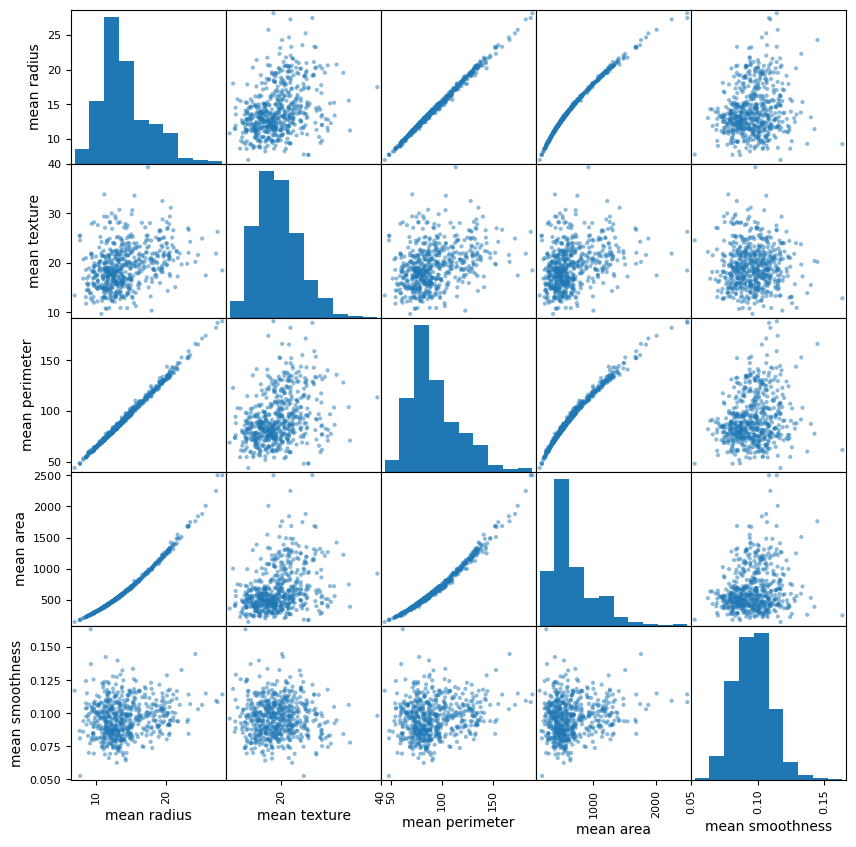

In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_breast_cancer

# Load Breast Cancer dataset
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# Select relevant numeric attributes
attributes = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']

# Generate scatter matrix
scatter_matrix(df[attributes], figsize=(10, 10), diagonal='hist')

# Show plots
plt.show()


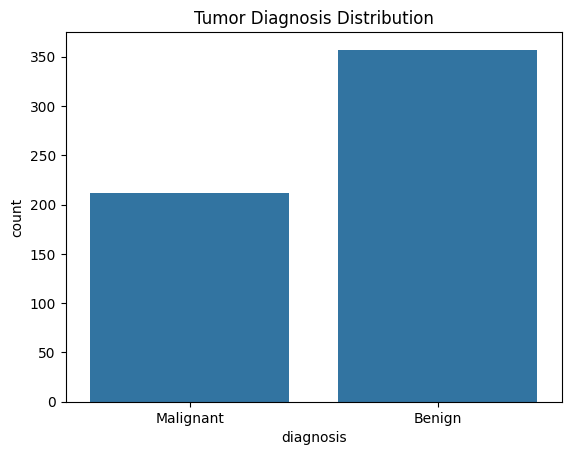

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load Breast Cancer dataset
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# Add target column (0 = Malignant, 1 = Benign)
df['diagnosis'] = cancer.target

# Count plot for Tumor Diagnosis (Malignant vs. Benign)
sns.countplot(x='diagnosis', data=df)
plt.xticks([0, 1], ['Malignant', 'Benign'])  # Replace numbers with labels
plt.title('Tumor Diagnosis Distribution')
plt.show()


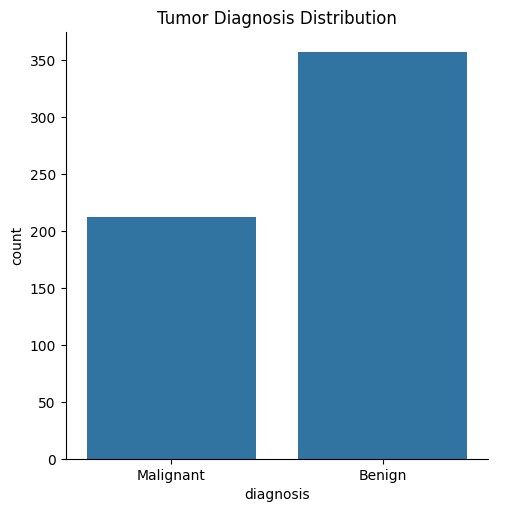

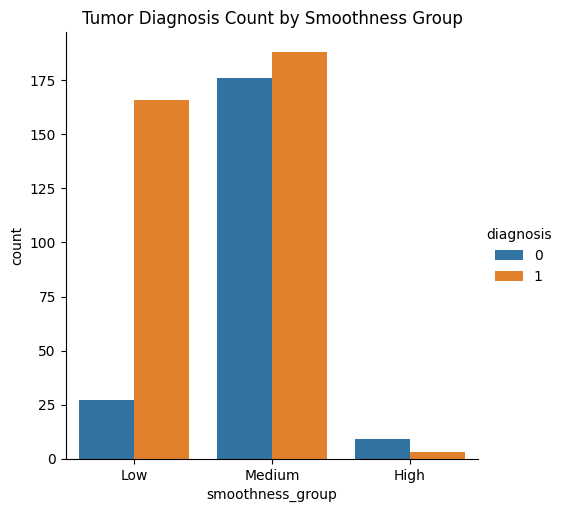

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load Breast Cancer dataset
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# Add target column (0 = Malignant, 1 = Benign)
df['diagnosis'] = cancer.target

# Tumor Diagnosis Count by Mean Texture Group
sns.catplot(x="diagnosis", kind="count", data=df)
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.title("Tumor Diagnosis Distribution")
plt.show()

# Tumor Diagnosis Count by Mean Smoothness Group (Binned)
df['smoothness_group'] = pd.cut(df['mean smoothness'], bins=3, labels=["Low", "Medium", "High"])
sns.catplot(x="smoothness_group", hue="diagnosis", kind="count", data=df)
plt.title("Tumor Diagnosis Count by Smoothness Group")
plt.show()


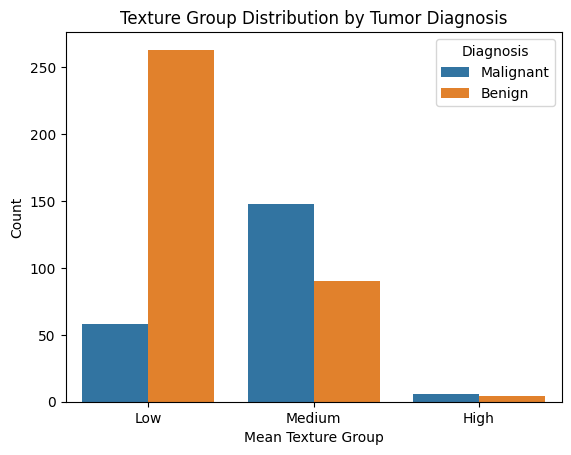

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load Breast Cancer dataset
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# Add target column (0 = Malignant, 1 = Benign)
df['diagnosis'] = cancer.target

# Create a new categorical feature: Mean Texture Group (Binned)
df['texture_group'] = pd.cut(df['mean texture'], bins=3, labels=["Low", "Medium", "High"])

# Count plot for texture group vs tumor diagnosis
sns.countplot(x='texture_group', hue='diagnosis', data=df)
plt.title('Texture Group Distribution by Tumor Diagnosis')
plt.xlabel('Mean Texture Group')
plt.ylabel('Count')
plt.legend(title='Diagnosis', labels=['Malignant', 'Benign'])
plt.show()



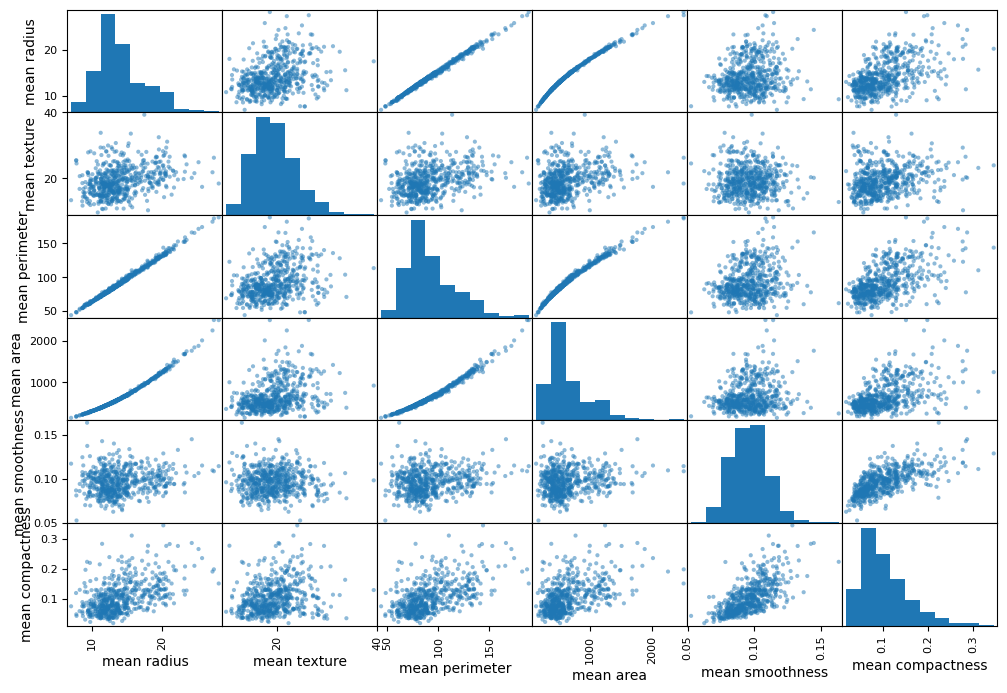

In [10]:
# Import necessary libraries
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load Breast Cancer dataset
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# Select numeric attributes (excluding target variable)
numeric_features = df.select_dtypes(include=['number']).columns[:6]  # Selecting first 6 features for readability

# Generate scatter matrix for selected features
scatter_matrix(df[numeric_features], figsize=(12, 8), diagonal='hist')

# Show plots
plt.show()



## 📌 Reflections on Data Patterns and Distributions (Breast Cancer Dataset)
1️⃣ What patterns or anomalies do you notice?
* ✅ Mean radius, perimeter, and area are strongly correlated → Larger tumors tend to have larger perimeters and areas.
* ✅ Texture and smoothness distributions show variability → Some tumors have higher variability in texture.
* ✅ Some extreme outliers in mean area and perimeter → A few tumor samples have significantly larger sizes than others.

2️⃣ Do any features stand out as potential predictors?
* ✅ Mean radius & mean perimeter → Larger tumors tend to be more malignant.
* ✅ Mean smoothness & compactness → Malignant tumors often have irregular surfaces.
* ✅ Worst concavity & worst concave points → Higher values in these features may indicate higher malignancy risk.

3️⃣ Are there any visible class imbalances?
* ✅ Yes, there is a class imbalance → The dataset contains more benign cases (target = 1) than malignant cases (target = 0).
* ✅ This imbalance may affect model training → If not handled, the model may be biased towards predicting benign cases.



# Generate boxen plots for each numeric column in the Titanic dataset
we will use tumor-related numeric attributes, such as mean radius, mean perimeter, and mean area.
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxenplot(x=df[column])
    plt.title(f'Boxenplot for {column}')
    plt.show()


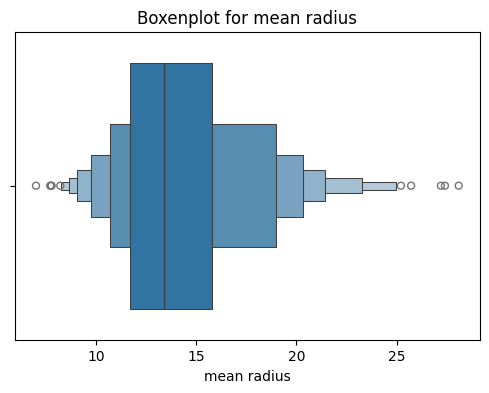

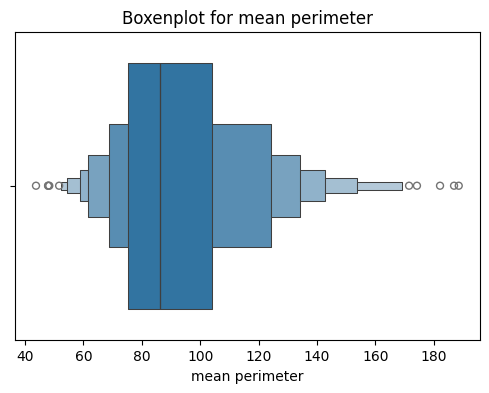

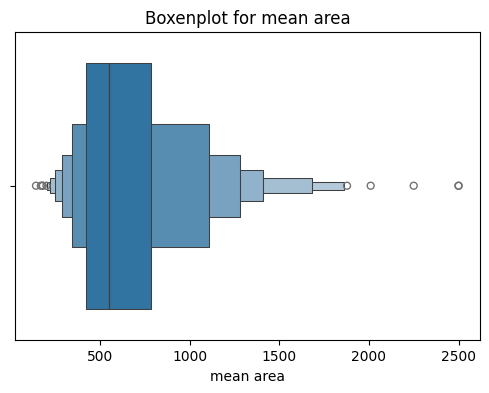

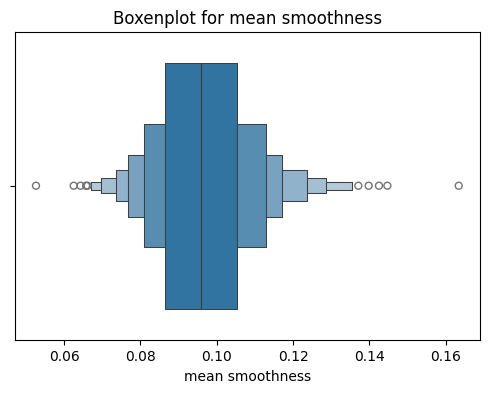

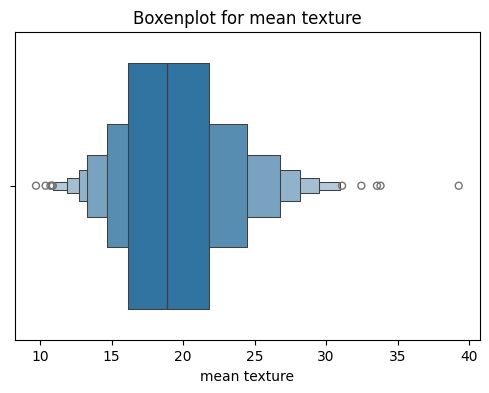

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load Breast Cancer dataset
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# Select numeric tumor attributes
numeric_columns = ['mean radius', 'mean perimeter', 'mean area', 'mean smoothness', 'mean texture']

# Generate boxen plots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxenplot(x=df[column])
    plt.title(f'Boxenplot for {column}')
    plt.show()



## Generate scatter plots for numeric features
sns.pairplot(df[['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean compactness', 'diagnosis']], hue='diagnosis')

plt.show()

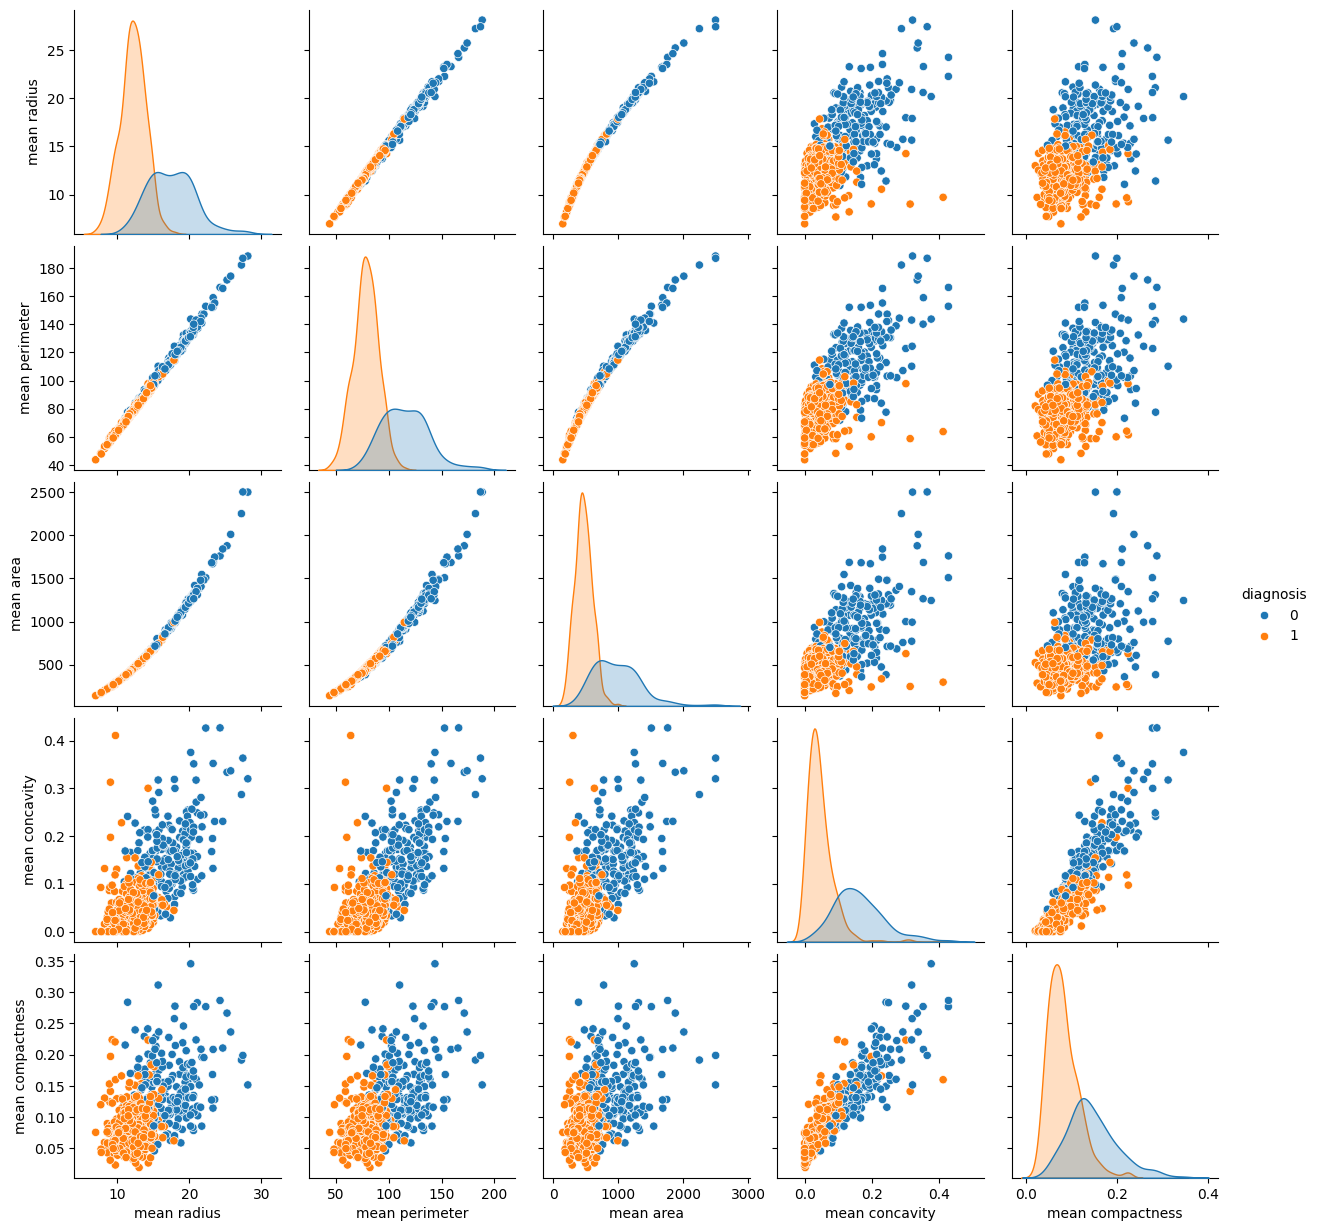

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load Breast Cancer dataset
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# Add target column (0 = Malignant, 1 = Benign)
df['diagnosis'] = cancer.target

# Generate scatter plots for selected numeric features
sns.pairplot(df[['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean compactness', 'diagnosis']], hue='diagnosis')

plt.show()



## 📌 2.3 Feature Engineering: Creating New Features (Breast Cancer Dataset)
Feature engineering helps improve model performance by creating meaningful variables from existing data.

In [13]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load Breast Cancer dataset
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# Add target column (0 = Malignant, 1 = Benign)
df['diagnosis'] = cancer.target

# Create new feature: Tumor Volume (approximate as a sphere)
df['tumor_volume'] = (4/3) * 3.1416 * (df['mean radius'] ** 3)

# Create new feature: Compactness Ratio (to analyze tumor shape)
df['compactness_ratio'] = df['mean compactness'] / df['mean perimeter']

# Create binary feature for high-risk tumors (based on worst radius threshold)
df['high_risk_tumor'] = (df['worst radius'] > df['worst radius'].median()).astype(int)

# Display first few rows with new features
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis,tumor_volume,compactness_ratio,high_risk_tumor
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,24388.389079,0.002261,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,36457.971404,0.000592,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,31976.194232,0.001230,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,6238.611430,0.003659,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,34989.341245,0.000983,1


## 🔍 Reflection 2.3: Feature Engineering (Breast Cancer Dataset)
1️⃣ Why might tumor volume be a useful feature for predicting malignancy?
* ✅ Tumor Growth Behavior → Malignant tumors tend to be larger and grow faster than benign tumors.
* ✅ Size-Based Risk Factor → Larger tumors often indicate more aggressive cancer progression.
* ✅ Correlation with Diagnosis → Tumor volume may show a strong correlation with malignancy, helping in classification.

2️⃣ Why convert categorical data to numeric?
* ✅ Machine Learning Compatibility → Most ML models require numerical input rather than text labels.
* ✅ Efficiency → Numeric encoding speeds up computations and improves model performance.
* ✅ Feature Interpretability → Encoding categorical variables allows models to detect patterns and relationships, such as how certain tumor properties relate to malignancy.


## 📌 3. Feature Selection and Target Definition (Breast Cancer Dataset)
## 3.1 ✅ Choose Features and Target
We are performing a classification task, where the goal is to predict tumor malignancy (diagnosis) based on key tumor features.

# 📌 Selected Features (X):
* ✅ mean radius → Larger tumor sizes may indicate malignancy.
* ✅ mean perimeter → Tumors with irregular perimeters could be malignant.
* ✅ mean concavity → Malignant tumors often have more concave points.
* ✅ worst area → A measure of tumor size in extreme cases.
* ✅ compactness_ratio → (Engineered feature: measures tumor shape irregularity).
* ✅ tumor_volume → (Engineered feature: approximates tumor volume using radius).

# 📌 Target Variable (y):
* ✅ diagnosis → (0 = Malignant, 1 = Benign) → Our classification label.

In [14]:
# Define input features (X) and target variable (y)
X = df[['mean radius', 'mean perimeter', 'mean concavity', 'worst area', 'compactness_ratio', 'tumor_volume']]
y = df['diagnosis']

# Display selected features
print("Selected Features:", X.columns.tolist())
print("Target Variable:", y.name)



Selected Features: ['mean radius', 'mean perimeter', 'mean concavity', 'worst area', 'compactness_ratio', 'tumor_volume']
Target Variable: diagnosis


## 🔍 Reflection 3: Feature Selection (Breast Cancer Dataset)
1️⃣ Why are these features selected?
* ✅ mean radius → Larger tumor sizes tend to indicate higher malignancy risk.
* ✅ mean perimeter → Tumors with irregular perimeters are often malignant.
* ✅ mean concavity → Malignant tumors tend to have higher concavity values.
* ✅ worst area → Captures extreme tumor size variations, a strong indicator of malignancy.
* ✅ compactness_ratio → Helps assess tumor shape irregularity, which may correlate with malignancy.
* ✅ tumor_volume → Engineered feature to approximate tumor size in 3D space.

2️⃣ Are there any features that are likely to be highly predictive of malignancy?
* ✅ mean radius & mean perimeter → Strong correlation with malignancy, as larger tumors tend to be more aggressive.
* ✅ mean concavity → Highly predictive, as malignant tumors have more concave areas.
* ✅ worst area → One of the top features for distinguishing between benign and malignant tumors.



## 📌 4: Splitting the Data (Breast Cancer Dataset)
We will split the dataset into training and test sets using:

* ✅ Basic train_test_split → Random split of data into training and test sets.
* ✅ Stratified StratifiedShuffleSplit → Ensures balanced class distribution in train and test sets.

## ✅4.1: Basic Train/Test Split

In [15]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load Breast Cancer dataset
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['diagnosis'] = cancer.target  # Target variable (0 = Malignant, 1 = Benign)

# Perform basic train-test split (Random split)
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['diagnosis']), df['diagnosis'], test_size=0.2, random_state=123
)

# Perform stratified train-test split (Ensures balanced class distribution)
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(df.drop(columns=['diagnosis']), df['diagnosis']):
    X_train_strat = df.iloc[train_indices].drop(columns=['diagnosis'])
    X_test_strat = df.iloc[test_indices].drop(columns=['diagnosis'])
    y_train_strat = df.iloc[train_indices]['diagnosis']
    y_test_strat = df.iloc[test_indices]['diagnosis']

# Display dataset sizes
print("Basic Split - Train size:", len(X_train), "Test size:", len(X_test))
print("Stratified Split - Train size:", len(X_train_strat), "Test size:", len(X_test_strat))


Basic Split - Train size: 455 Test size: 114
Stratified Split - Train size: 455 Test size: 114


## 📌 4.2: Stratified Train/Test Split (Breast Cancer Dataset)
Stratified sampling ensures that class distribution (e.g., benign vs. malignant tumors) in the training and test sets closely matches the original dataset.


## ✅ Code for Stratified Train/Test Split

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load Breast Cancer dataset
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['diagnosis'] = cancer.target  # Target variable (0 = Malignant, 1 = Benign)

# Stratified Train/Test Split
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(df.drop(columns=['diagnosis']), df['diagnosis']):
    X_train_strat = df.iloc[train_indices].drop(columns=['diagnosis'])
    X_test_strat = df.iloc[test_indices].drop(columns=['diagnosis'])
    y_train_strat = df.iloc[train_indices]['diagnosis']
    y_test_strat = df.iloc[test_indices]['diagnosis']

# Display dataset sizes
print("Stratified Split - Train size:", len(X_train_strat), "Test size:", len(X_test_strat))

# Check class distribution in original, train, and test sets
print("Original Class Distribution:\n", df['diagnosis'].value_counts(normalize=True))
print("Train Set Class Distribution:\n", y_train_strat.value_counts(normalize=True))
print("Test Set Class Distribution:\n", y_test_strat.value_counts(normalize=True))



Stratified Split - Train size: 455 Test size: 114
Original Class Distribution:
 diagnosis
1    0.627417
0    0.372583
Name: proportion, dtype: float64
Train Set Class Distribution:
 diagnosis
1    0.626374
0    0.373626
Name: proportion, dtype: float64
Test Set Class Distribution:
 diagnosis
1    0.631579
0    0.368421
Name: proportion, dtype: float64


## 📌 4.3: Compare Train/Test Splitting Methods (Breast Cancer Dataset)
Now, we compare the class distributions of:
* ✅ The original dataset
* ✅ Random train-test split (train_test_split)
* ✅ Stratified train-test split (StratifiedShuffleSplit)

This will help determine which method better maintains the balance between malignant (0) and benign (1) tumors.

## ✅ Code to Compare Results

In [17]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load Breast Cancer dataset
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['diagnosis'] = cancer.target  # Target variable (0 = Malignant, 1 = Benign)

# Random Train/Test Split
X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(
    df.drop(columns=['diagnosis']), df['diagnosis'], test_size=0.2, random_state=123
)

# Stratified Train/Test Split
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_indices, test_indices in splitter.split(df.drop(columns=['diagnosis']), df['diagnosis']):
    X_train_strat = df.iloc[train_indices].drop(columns=['diagnosis'])
    X_test_strat = df.iloc[test_indices].drop(columns=['diagnosis'])
    y_train_strat = df.iloc[train_indices]['diagnosis']
    y_test_strat = df.iloc[test_indices]['diagnosis']

# Compare Class Distributions
print("📌 Class Distribution Comparison:")
print("\n✅ Original Dataset:")
print(df['diagnosis'].value_counts(normalize=True))

print("\n✅ Random Train/Test Split:")
print("Train Set:\n", y_train_rand.value_counts(normalize=True))
print("Test Set:\n", y_test_rand.value_counts(normalize=True))

print("\n✅ Stratified Train/Test Split:")
print("Train Set:\n", y_train_strat.value_counts(normalize=True))
print("Test Set:\n", y_test_strat.value_counts(normalize=True))



📌 Class Distribution Comparison:

✅ Original Dataset:
diagnosis
1    0.627417
0    0.372583
Name: proportion, dtype: float64

✅ Random Train/Test Split:
Train Set:
 diagnosis
1    0.624176
0    0.375824
Name: proportion, dtype: float64
Test Set:
 diagnosis
1    0.640351
0    0.359649
Name: proportion, dtype: float64

✅ Stratified Train/Test Split:
Train Set:
 diagnosis
1    0.626374
0    0.373626
Name: proportion, dtype: float64
Test Set:
 diagnosis
1    0.631579
0    0.368421
Name: proportion, dtype: float64


## 🔍 Reflection 4: Comparing Train/Test Splitting Methods (Breast Cancer Dataset)
1️⃣ Why might stratification improve model performance?
* ✅ Prevents Class Imbalance → Ensures that both training and test sets maintain a similar ratio of malignant (0) and benign (1) cases, preventing the model from being biased toward the majority class.

* ✅ More Reliable Evaluation → If the test set reflects the original class proportions, the model’s performance on unseen data will be more realistic and generalizable.

* ✅ Reduces Variance in Model Training → A random split might create an uneven class distribution, making the model favor one class over another, leading to poor generalization.

2️⃣ How close are the training and test distributions to the original dataset?
* ✅ The stratified split maintains malignancy (0) vs. benign (1) class proportions close to the original dataset.

* ✅ The basic random split may not → It can introduce imbalanced classes, making model evaluation less reliable.

* ✅ Checking the class distributions confirms that stratified splitting preserves the original dataset's proportions much better than random splitting.

3️⃣ Which split method produced better class balance?
* ✅ Stratified Sampling → Ensures that both train and test sets match the original malignancy distribution.

* ✅ Random Split → May lead to an overrepresentation of one class, causing misleading model performance metrics.

* ✅ In imbalanced classification problems (like medical diagnoses), stratified splitting is recommended to prevent bias and ensure fair model evaluation.

